# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_curve,auc,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Reading Datasets

In [2]:
#reading dataset
df_train=pd.read_csv('./train.csv')
bid=pd.read_csv('./bids.csv')
df_test=pd.read_csv('./test.csv')

In [3]:
df_train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0


In [4]:
bid.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [5]:
#merging Datasets
def mergeDF(df):
    df_ans=df.merge(bid,how='left')
    return df_ans
df=mergeDF(df_train)
test=mergeDF(df_test)
print(df.shape)
df.info()

(1465818, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465818 entries, 0 to 1465817
Data columns (total 12 columns):
bidder_id          1465818 non-null object
payment_account    1465818 non-null object
address            1465818 non-null object
outcome            1465818 non-null int64
bid_id             1465794 non-null float64
auction            1465794 non-null object
merchandise        1465794 non-null object
device             1465794 non-null object
time               1465794 non-null float64
country            1463674 non-null object
ip                 1465794 non-null object
url                1465794 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 145.4+ MB


In [6]:
df.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


# Missing Value treatment and Encoding

In [11]:
#missing values calculation
def missingStats(df):
    missing_df=df.isnull().sum()
    missing_df_percent=df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100
    miss_val=pd.concat([missing_df,missing_df_percent],axis=1,sort=False)
    miss_val=miss_val.rename(columns={0:'miss_val',1:"% missing"})
    miss_val=miss_val.sort_values('% missing',ascending=False).round(1)
    return miss_val
miss_val_train=missingStats(df)
miss_val_train

,miss_val,% missing
country,2144,0.1
bid_id,24,0.0
auction,24,0.0
merchandise,24,0.0
device,24,0.0
time,24,0.0
ip,24,0.0
url,24,0.0
bidder_id,0,0.0
payment_account,0,0.0


In [12]:
#column types
df.dtypes.value_counts()

object     9
float64    2
int64      1
dtype: int64

In [13]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

bidder_id            1498
payment_account      1498
address              1498
auction             11688
merchandise            10
device               4858
country               187
ip                 536924
url                378704
dtype: int64

In [14]:
df.isnull().sum()

bidder_id             0
payment_account       0
address               0
outcome               0
bid_id               24
auction              24
merchandise          24
device               24
time                 24
country            2144
ip                   24
url                  24
dtype: int64

## Sorting the data frame with bidder_id and time 

In [15]:
df = df.sort_values(['bidder_id', 'time'], ascending = [True, True])
test = test.sort_values(['bidder_id', 'time'], ascending = [True, True])

In [16]:
bidder_id_train=df['bidder_id']
bidder_id_test=test['bidder_id']

In [17]:
# Create a label encoder object

def encoder(train,test):
    le = LabelEncoder()
    le_count = 0
    # Iterate through the columns
    for col in df:
        if df[col].dtype == 'object':
            print('columns which are encoded: ',col)
            # Train on the training data
            le.fit(pd.concat([train[col].astype(str),test[col].astype(str)], axis=0,sort=False))
            # Transform both training and testing data
            df[col] = le.transform(df[col].astype(str))
            test[col] = le.transform(test[col].astype(str))
            # Keep track of how many columns were label encoded
            le_count += 1

    print('%d columns were label encoded.' % le_count)
    return train,test
df,test=encoder(df,test)

columns which are encoded:  bidder_id
columns which are encoded:  payment_account
columns which are encoded:  address
columns which are encoded:  auction
columns which are encoded:  merchandise
columns which are encoded:  device
columns which are encoded:  country
columns which are encoded:  ip
columns which are encoded:  url
9 columns were label encoded.


In [18]:
#replacing missing value with median value for bid id and ffill for time
df['time']=df['time'].fillna(method='ffill')
df['bid_id']=df['bid_id'].fillna(np.median(df['bid_id'].dropna()))             

# Exploratory Data Analysis

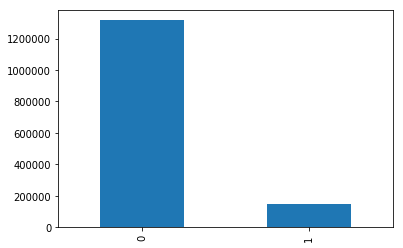

In [19]:
#target distribution
#outcome variable
df['outcome'].value_counts().plot.bar()

In [20]:
df.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
       'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url'],
      dtype='object')

In [21]:
#url variable
urls=df['url'].value_counts()
print('total no of unique urls',len(urls))
print('no of url hit once',len(urls[urls.values==1]))
print('no of url not hit only once',len(urls)-len(urls[urls.values==1]))

total no of unique urls 378705
no of url hit once 312754
no of url not hit only once 65951


In [22]:
#ip variable
urls=df['ip'].value_counts()
print('total no of unique ip',len(urls))
print('no of ip hit once',len(urls[urls.values==1]))
print('no of ip not hit only once',len(urls)-len(urls[urls.values==1]))

total no of unique ip 536925
no of ip hit once 415955
no of ip not hit only once 120970


total no of unique country 188


Text(0.5, 1.0, 'country distribution')

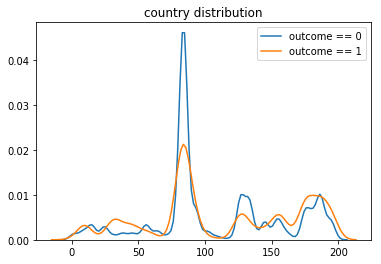

In [23]:
#country variable
urls=df['country'].value_counts()
print('total no of unique country',len(urls))
#top country kde plot
sns.kdeplot(df.loc[df['outcome']==0,'country'],label='outcome == 0')
sns.kdeplot(df.loc[df['outcome']==1,'country'],label='outcome == 1')
plt.title('country distribution')

In [24]:
df.describe()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
count,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06,1.465818e+06
mean,1.064406e+03,9.490372e+02,1.073521e+03,1.025230e-01,3.884529e+06,6.381897e+03,6.796649e+00,2.598760e+03,9.696016e+15,1.082903e+02,5.137755e+05,4.337192e+05
std,5.493068e+02,6.161004e+02,5.852905e+02,3.033349e-01,2.187957e+06,3.371638e+03,1.848516e+00,1.742248e+03,5.193014e+13,4.972428e+01,2.982389e+05,1.885656e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.631917e+15,0.000000e+00,6.000000e+00,0.000000e+00
25%,6.390000e+02,4.290000e+02,4.530000e+02,0.000000e+00,2.031426e+06,3.783000e+03,6.000000e+00,1.086000e+03,9.640932e+15,8.400000e+01,2.523040e+05,2.836475e+05
50%,1.137000e+03,8.250000e+02,1.159000e+03,0.000000e+00,3.912860e+06,6.917000e+03,7.000000e+00,2.620000e+03,9.700176e+15,8.400000e+01,5.181930e+05,5.643580e+05
75%,1.582000e+03,1.552000e+03,1.578000e+03,0.000000e+00,5.768388e+06,8.922000e+03,7.000000e+00,3.951000e+03,9.760517e+15,1.460000e+02,7.753860e+05,5.772850e+05
max,2.011000e+03,2.012000e+03,2.012000e+03,1.000000e+00,7.656326e+06,1.274000e+04,1.000000e+01,5.729000e+03,9.772885e+15,1.980000e+02,1.030950e+06,6.638710e+05


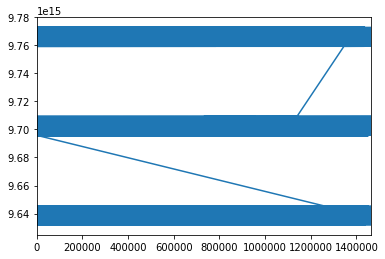

In [25]:
df['time'].sort_values().dropna().plot()

In [26]:
#bidders variable
bidcross=pd.crosstab(df['bidder_id'],df['outcome'])
print('total no of bidders',len(bidcross))
print('no of bidders identified as robots',len(bidcross[bidcross[1]>0].index))

total no of bidders 1498
no of bidders identified as robots 70


In [27]:
#auctions variable
bidcross=pd.crosstab(df['auction'],df['outcome'])
print('total no of auctions',len(bidcross))
print('no of auctions identified as robots',len(bidcross[bidcross[1]>0].index))

total no of auctions 11689
no of auctions identified as robots 4356


no of url not hit only once 11


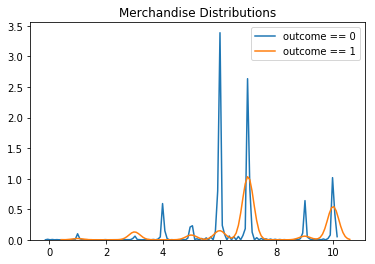

In [28]:
#merchandise plot
urls=df['merchandise'].value_counts()
print('no of url not hit only once',len(urls)-len(urls[urls.values==1]))
sns.kdeplot(df.loc[df['outcome']==0,'merchandise'],label='outcome == 0')
plt.title('Merchandise Distributions')
sns.kdeplot(df.loc[df['outcome']==1,'merchandise'],label='outcome == 1')

no of url not hit only once 3916


Text(0.5, 1.0, 'Device Distribution')

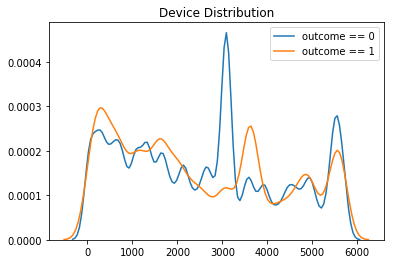

In [29]:
#device plot
urls=df['device'].value_counts()
print('no of url not hit only once',len(urls)-len(urls[urls.values==1]))
sns.kdeplot(df.loc[df['outcome']==0,'device'],label='outcome == 0')
sns.kdeplot(df.loc[df['outcome']==1,'device'],label='outcome == 1')
plt.title('Device Distribution')

In [30]:
print(df.columns)
print(df.shape)

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
       'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url'],
      dtype='object')
(1465818, 12)


# Feature Creation

In [31]:
def featureCreation(df):
    df['countOfBids']=df.groupby('bidder_id')['bidder_id'].transform('count')
    df['countOfBidsPerAuction']=df.groupby(['bidder_id','auction'])['auction'].transform('count')
    df['timeDiffEachBids']=df.groupby(['bidder_id'])['time'].transform(lambda x: x.diff()) 
    df['timeDiffEachBidsPerAuction']=df.groupby(['bidder_id','auction'])['time'].transform(lambda x: x.diff())
    df['hour']=pd.to_datetime(df['time']).dt.hour
    df['day']=pd.to_datetime(df['time']).dt.day
    df['dayOfWeek']=pd.to_datetime(df['time']).dt.dayofweek
    df['countBids_CountBidsAuction']=df.groupby(['bidder_id','auction'])['auction'].transform('count')/df.groupby('bidder_id')['bidder_id'].transform('count')
    df['timeDiffEachBidsPerAuctionMax']=df.groupby(['bidder_id'])['timeDiffEachBidsPerAuction'].transform(np.max)
    df['timeDiffEachBidsPerAuctionMin']=df.groupby(['bidder_id'])['timeDiffEachBidsPerAuction'].transform(np.min)
    df['timeDiffEachBidsPerAuctionAvg']=df.groupby(['bidder_id'])['timeDiffEachBidsPerAuction'].transform(np.min)
    df['timeDiffEachBidsMax']=df.groupby(['bidder_id'])['timeDiffEachBids'].transform(np.max)
    df['timeDiffEachBidsMin']=df.groupby(['bidder_id'])['timeDiffEachBids'].transform(np.min)
    df['timeDiffEachBidsAvg']=df.groupby(['bidder_id'])['timeDiffEachBids'].transform(np.min)
    newFeatures=['countOfBids','countOfBidsPerAuction','timeDiffEachBids','timeDiffEachBidsPerAuction','hour','day','dayOfWeek','countBids_CountBidsAuction','timeDiffEachBidsPerAuctionMax','timeDiffEachBidsPerAuctionMin','timeDiffEachBidsPerAuctionAvg','timeDiffEachBidsMax','timeDiffEachBidsMin','timeDiffEachBidsAvg']
    for col in newFeatures:
        df[col]=df[col].replace(np.nan,0)
    return df

In [32]:
df=featureCreation(df)
test=featureCreation(test)

# Correlation analysis

countOfBids                     -0.185735
timeDiffEachBidsPerAuctionMax   -0.132250
timeDiffEachBidsMax             -0.126721
bidder_id                       -0.099460
countOfBidsPerAuction           -0.089715
bid_id                          -0.071501
countBids_CountBidsAuction      -0.046430
device                          -0.017893
timeDiffEachBidsPerAuction      -0.012792
timeDiffEachBids                -0.005899
hour                            -0.004459
timeDiffEachBidsPerAuctionMin   -0.004438
timeDiffEachBidsPerAuctionAvg   -0.004438
timeDiffEachBidsMin             -0.002539
timeDiffEachBidsAvg             -0.002539
ip                              -0.002487
auction                          0.027070
country                          0.037916
url                              0.040229
day                              0.085228
dayOfWeek                        0.085228
time                             0.103397
address                          0.111076
merchandise                      0

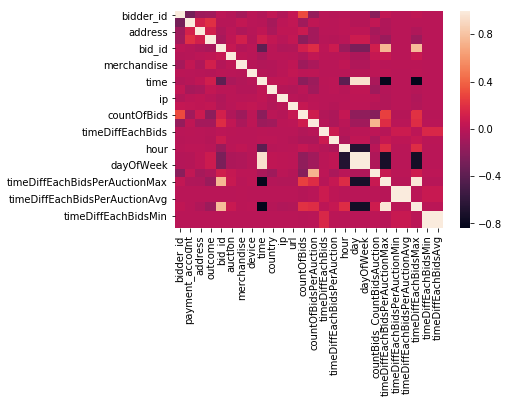

In [33]:
# Find correlations with the target and sort
correlations = df.corr()['outcome'].sort_values()

# Display correlations
print(correlations)
sns.heatmap(df.corr())

In [34]:
df.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,hour,day,dayOfWeek,countBids_CountBidsAuction,timeDiffEachBidsPerAuctionMax,timeDiffEachBidsPerAuctionMin,timeDiffEachBidsPerAuctionAvg,timeDiffEachBidsMax,timeDiffEachBidsMin,timeDiffEachBidsAvg
60142,0,1148,1064,0,7179832.0,1526,6,4397,9.706345e+15,23,...,8,23,3,1.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0
1019431,2,320,754,0,2501797.0,7484,1,3549,9.632300e+15,19,...,11,22,2,0.007092,6.524574e+13,526315790.0,526315790.0,5.012521e+13,526315790.0,526315790.0
1019432,2,320,754,0,2724778.0,4856,1,189,9.633185e+15,180,...,11,22,2,0.028369,6.524574e+13,526315790.0,526315790.0,5.012521e+13,526315790.0,526315790.0
1019433,2,320,754,0,2742648.0,11664,1,660,9.633287e+15,84,...,11,22,2,0.007092,6.524574e+13,526315790.0,526315790.0,5.012521e+13,526315790.0,526315790.0
1019434,2,320,754,0,2852666.0,5805,1,13,9.634158e+15,81,...,12,22,2,0.007092,6.524574e+13,526315790.0,526315790.0,5.012521e+13,526315790.0,526315790.0


## Dropping Features

In [35]:
def dropFeatures(df):
    copy_bidder=df['bidder_id']
    df=df.drop('bidder_id',axis=1)
    df=df.drop('bid_id',axis=1)
    df=df.drop('payment_account',axis=1)
    df=df.drop('address',axis=1)
    return df,copy_bidder
df,_=dropFeatures(df)
test,_=dropFeatures(test)

# initial LR model

In [33]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('outcome',axis=1), df['outcome'], test_size=0.30, random_state=42,stratify=df['outcome'])
#scaling features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#Logistic Regression model
model = LogisticRegression(solver='lbfgs',C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


0.8974908242485434


/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Random Forest model

In [36]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('outcome',axis=1), df['outcome'], test_size=0.30, random_state=42,stratify=df['outcome'])
cols=df.columns

In [35]:
model = RandomForestClassifier(n_estimators=100,)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Model Metrics : Random Forest

In [37]:
def metricsModel(model):
    y_pred = model.predict(X_test)
    print('f1_score :',f1_score(y_test, y_pred))

    #feature importance
    print('feature importances:')
    for name, importance in zip(cols, model.feature_importances_):
        print(name, "=", importance)
    features =cols
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    #confusion matrix
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='d')# font size
    plt.show()

In [38]:
def rocauc(model):
    # predict probabilities & keep probabilities for the positive outcome only
    y_probs = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_probs)

    print('Random Forest: ROC AUC=%.3f' % (auc))
    #roc auc curve
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_probs)
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RF')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

# Gradient Boosting Trees

f1_score : 0.9022217895992017
feature importances:
outcome = 0.0002297415525225077
auction = 0.037185271016707544
merchandise = 6.203561396785328e-07
device = 0.0014175023499647188
time = 0.008569103964746558
country = 0.0
ip = 0.0
url = 0.49692753646194965
countOfBids = 0.007791571864515911
countOfBidsPerAuction = 0.0
timeDiffEachBids = 0.0
timeDiffEachBidsPerAuction = 1.2670505321121198e-07
hour = 5.6559676379177615e-08
day = 0.0
dayOfWeek = 0.013232677201621197
countBids_CountBidsAuction = 0.24811131540179154
timeDiffEachBidsPerAuctionMax = 0.005021980737753339
timeDiffEachBidsPerAuctionMin = 0.002686484037906104
timeDiffEachBidsPerAuctionAvg = 0.1723103621734156
timeDiffEachBidsMax = 0.003733336851792548
timeDiffEachBidsMin = 0.0027823127644435114


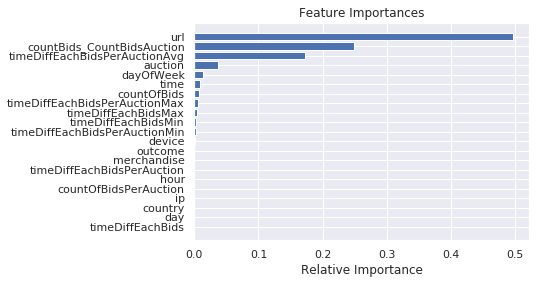

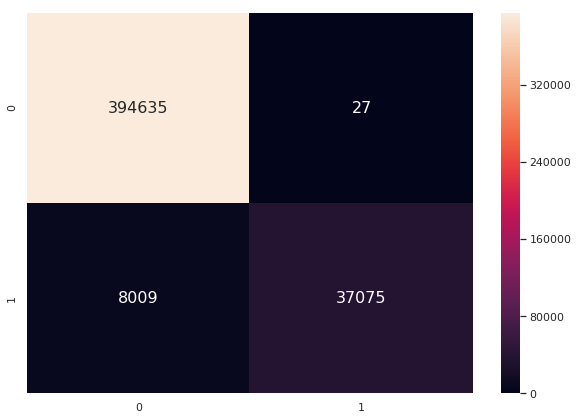

Random Forest: ROC AUC=0.999


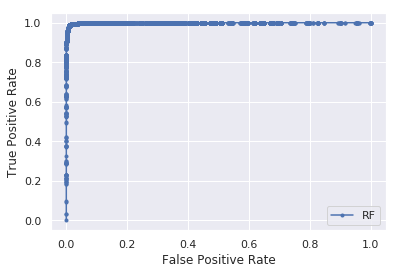

In [39]:
gb=GradientBoostingClassifier(random_state=60,n_estimators=100)
gb.fit(X_train, y_train)
metricsModel(gb)
rocauc(gb)

# Gradient Boosting Trees : Grid Search

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,5, 10],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,6],
    'min_samples_split': [2,6],
    'n_estimators': [100, 200]
}
# Create a based model
gradB = GradientBoostingClassifier(random_state=60)
# Instantiate the grid search model
gsb = GridSearchCV(estimator = gradB, param_grid= param_grid, cv = 3, n_jobs = 2, verbose = 2,refit=True,scoring='f1')
gsb.fit(X_train, y_train)
final_model_gsb=gsb.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/an

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky

In [62]:
ans=pd.DataFrame(gsb.cv_results_)
ans

f1_score : 0.9742761616667045
feature importances:
outcome = 0.003995912213863645
auction = 0.08603099899878977
merchandise = 0.0033816580545108954
device = 0.009681751406519098
time = 0.021809216195461188
country = 0.0025006359920431093
ip = 0.006167478989575988
url = 0.2500176465295808
countOfBids = 0.03591309319834412
countOfBidsPerAuction = 0.005792869041937142
timeDiffEachBids = 0.001134300212854384
timeDiffEachBidsPerAuction = 0.008682301481629429
hour = 0.003666857801013832
day = 0.007437448399681002
dayOfWeek = 0.0389181016255345
countBids_CountBidsAuction = 0.20138221451873314
timeDiffEachBidsPerAuctionMax = 0.015492087161075092
timeDiffEachBidsPerAuctionMin = 0.012619808026737378
timeDiffEachBidsPerAuctionAvg = 0.2693156343534911
timeDiffEachBidsMax = 0.009513316926007655
timeDiffEachBidsMin = 0.0065466688726167266


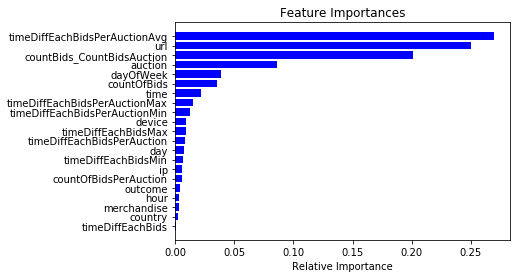

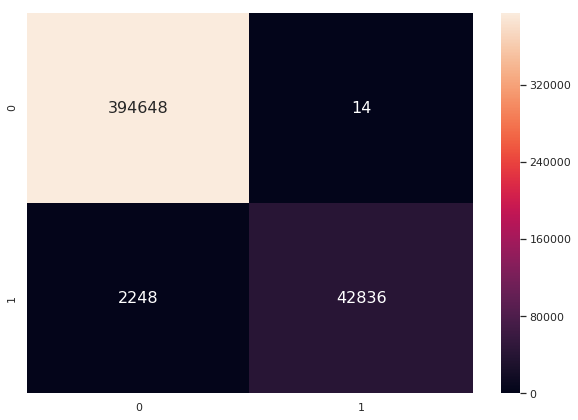

Random Forest: ROC AUC=1.000


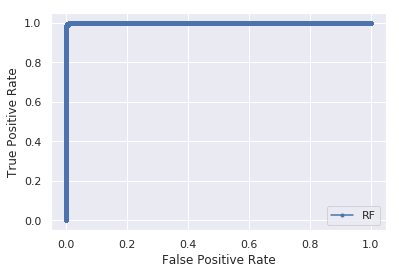

In [35]:
gbdt=GradientBoostingClassifier(random_state=60,n_estimators=100,max_depth=5,max_features='sqrt',min_samples_leaf=4,min_samples_split=4)
gbdt.fit(X_train, y_train)
metricsModel(gbdt)
rocauc(gbdt)

# refitting the model on entire data

f1_score : 0.978783144261033
feature importances:
outcome = 0.004074201180945076
auction = 0.08767120727096206
merchandise = 0.0034273773065398487
device = 0.01434412579859304
time = 0.02214731151637618
country = 0.0018327583616274561
ip = 0.005277155037225306
url = 0.22289741912684077
countOfBids = 0.03552821522563074
countOfBidsPerAuction = 0.01024361759236103
timeDiffEachBids = 0.0014349037855615546
timeDiffEachBidsPerAuction = 0.011723248007188228
hour = 0.004741226285145554
day = 0.0073866193741737906
dayOfWeek = 0.04105693080292957
countBids_CountBidsAuction = 0.19421152937324368
timeDiffEachBidsPerAuctionMax = 0.016676005104756152
timeDiffEachBidsPerAuctionMin = 0.01246120998074977
timeDiffEachBidsPerAuctionAvg = 0.28854458835067565
timeDiffEachBidsMax = 0.007061847016807946
timeDiffEachBidsMin = 0.007258503501666531


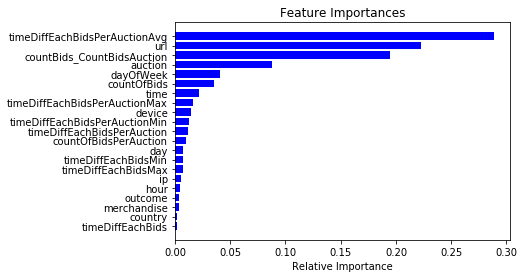

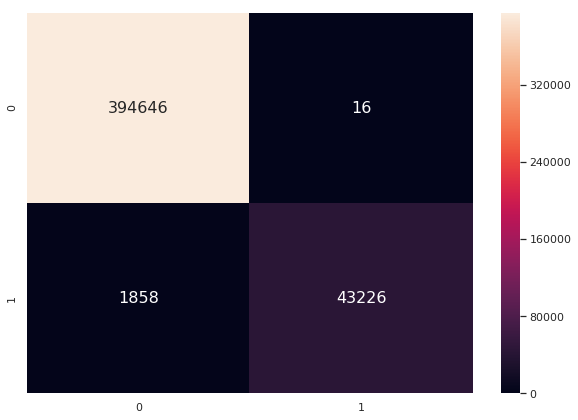

Random Forest: ROC AUC=1.000


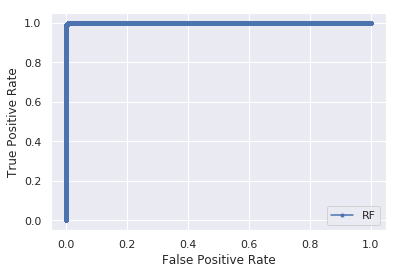

In [39]:
gbdt=GradientBoostingClassifier(random_state=60,n_estimators=100,max_depth=5,max_features='sqrt',min_samples_leaf=4,min_samples_split=4)
gbdt.fit(df.drop('outcome',axis=1), df['outcome'])
metricsModel(gbdt)
rocauc(gbdt)

In [40]:
test.loc[test['time'].isnull(),'time']=np.median(test['time'].dropna())
test.shape

(1605435, 21)

In [49]:
test.drop('bidder_id',axis=1,inplace=True)

In [50]:
test['prediction']=gbdt.predict(test)
test['prediction'].value_counts()

0    1599248
1       6187
Name: prediction, dtype: int64

In [53]:
test['bidder_id']=bidder_id_test

In [57]:
test[['bidder_id','prediction']].to_csv('submission_file.csv')

In [58]:
test.shape

(1605435, 23)

In [59]:
df_test.shape

(515, 3)

In [60]:
df_train.shape

(1498, 4)

In [95]:
ans=test.groupby('bidder_id')[['bidder_id','prediction']].agg(sum)

In [90]:
ans=ans.reset_index()

In [91]:
ans.loc[ans['prediction']>=1,'prediction']=1

In [92]:
ans.prediction.value_counts()

0    503
1     12
Name: prediction, dtype: int64

In [94]:
ans.to_csv('submission_file.csv')

In [96]:
ans.prediction.value_counts()

0       503
601       1
600       1
4548      1
299       1
43        1
31        1
24        1
14        1
12        1
11        1
3         1
1         1
Name: prediction, dtype: int64